In [1]:
import base64
import os
from io import BytesIO

import matplotlib.pyplot as plt
import requests
from PIL import Image

In [2]:
main_url = "http://localhost:8000"

In [3]:
resp_get = requests.get(main_url)
resp_get.json()

{'message': 'Welcome to the PaliGemma Segmentation API!'}

In [4]:
segm_url = os.path.join(main_url, "segment")
data = {
    'prompt': 'segment left wheel',
    'image_url': "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
}
resp_post = requests.post(segm_url, data=data)
resp_post.json()

{'image': 'iVBORw0KGgoAAAANSUhEUgAAAcAAAAHACAIAAAC6Ry8kAAEAAElEQVR4nMT92bOsWXYfhq1h7/0NOZw8451vjV3VA7qrG0CTAkmQlGhTNGBRpBUK21LYCvvVenKIEQyF/aQX2xGMkMN/gUNBUrLDlACQBEcQJBsDgQa6C13VY0331h3PPVOeHL5h77WWH/aXeU9Vd1U1BTi8+/apvHnyZn7fzr3XXuu3fuu38C//7NcQcP9wvx6NAOCd9979uZ//+T/81rdef/31r371q/PLxd/7J7/ZLhbjtPD9ev/2K49x7736bvn1X1re/eJpPbXggHrC6Hq1decV6jJY7OvClyauaUqAm9a+4LqXj2YvXJve2auOpq5EZRUwNGQzb6gEPYDBJwxDUB+SCJg5YgJEMzJDAzIDUwBE9cTKfnV2+d53vvtbf/Sdf3P//ocHe7f/wi/+B597+Wc/eO/Zw0c/3NsPDx8++Gf/7J8j0BtvvHHz5p3Hjx/93u/9/rvvvjcej/f3ZuvlYj4/77ronC/L8vz8oqpGX/zCF1NK9z649/j4OCn+5X//r+zv7//O7/xOjPHs7OzVV1/9uZ/7uWfPnjVNM66rf/kv/nEInpBTEkI/nc7Ozuaznd0//ad/4e23v/fOu++QA9HovQ+h7Lqu6zoiJ2JFKESk73sFA8JRPdrZ2UHEpmn6vl8ul2VZmlnwgcAmdd11Xd/3zNx1nXOuKIqiKBBxPJ60q0vtV0XhnfPOOc9uPBrNLy7W6/Xh/kFRlDF2ZeXG43q1WjFzVRXL1bLvezMz06oqd3Z2pjuTJLFpuovzxenpxenpOZM7unZ4cXFmplVVRElN29Z1fevWLSJ+8uTp/t4hMyOS98XTp09OT5587Stfct7dvHEjxjiZTlJKVVXt7MyIqGnWi+W6aSIQOMegtl4tvePpziSEQGCqCgTjnakvvHNeFcHw0aPHP/rReykCES8Wy6KoZnuzD58+PZsvv

In [5]:
my_resp = resp_post.json()
my_resp

{'image': 'iVBORw0KGgoAAAANSUhEUgAAAcAAAAHACAIAAAC6Ry8kAAEAAElEQVR4nMT92bOsWXYfhq1h7/0NOZw8451vjV3VA7qrG0CTAkmQlGhTNGBRpBUK21LYCvvVenKIEQyF/aQX2xGMkMN/gUNBUrLDlACQBEcQJBsDgQa6C13VY0331h3PPVOeHL5h77WWH/aXeU9Vd1U1BTi8+/apvHnyZn7fzr3XXuu3fuu38C//7NcQcP9wvx6NAOCd9979uZ//+T/81rdef/31r371q/PLxd/7J7/ZLhbjtPD9ev/2K49x7736bvn1X1re/eJpPbXggHrC6Hq1decV6jJY7OvClyauaUqAm9a+4LqXj2YvXJve2auOpq5EZRUwNGQzb6gEPYDBJwxDUB+SCJg5YgJEMzJDAzIDUwBE9cTKfnV2+d53vvtbf/Sdf3P//ocHe7f/wi/+B597+Wc/eO/Zw0c/3NsPDx8++Gf/7J8j0BtvvHHz5p3Hjx/93u/9/rvvvjcej/f3ZuvlYj4/77ronC/L8vz8oqpGX/zCF1NK9z649/j4OCn+5X//r+zv7//O7/xOjPHs7OzVV1/9uZ/7uWfPnjVNM66rf/kv/nEInpBTEkI/nc7Ozuaznd0//ad/4e23v/fOu++QA9HovQ+h7Lqu6zoiJ2JFKESk73sFA8JRPdrZ2UHEpmn6vl8ul2VZmlnwgcAmdd11Xd/3zNx1nXOuKIqiKBBxPJ60q0vtV0XhnfPOOc9uPBrNLy7W6/Xh/kFRlDF2ZeXG43q1WjFzVRXL1bLvezMz06oqd3Z2pjuTJLFpuovzxenpxenpOZM7unZ4cXFmplVVRElN29Z1fevWLSJ+8uTp/t4hMyOS98XTp09OT5587Stfct7dvHEjxjiZTlJKVVXt7MyIqGnWi+W6aSIQOMegtl4tvePpziSEQGCqCgTjnakvvHNeFcHw0aPHP/rReykCES8Wy6KoZnuzD58+PZsvv

In [6]:
mask_base54 = my_resp["masks"][0]["mask"]
mask_data = base64.b64decode(mask_base54)

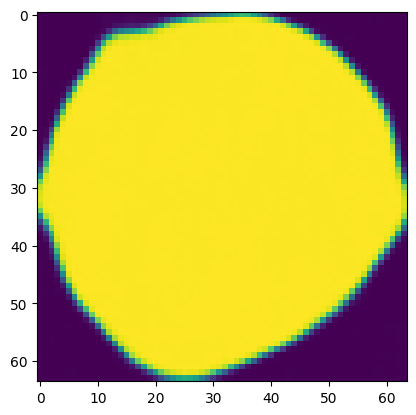

In [7]:
mask = Image.open(BytesIO(mask_data))
plt.imshow(mask)

In [8]:
image_base54 = my_resp["image"]
image_data = base64.b64decode(image_base54)

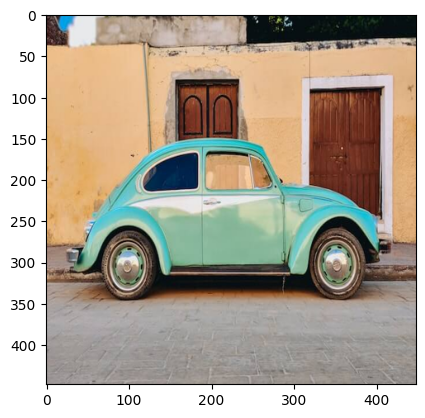

In [9]:
image = Image.open(BytesIO(image_data))
plt.imshow(image)

In [10]:
segm_url = os.path.join(main_url, "segment")
image_path = "bl_cat.png"

with open(image_path, "rb") as image_file:
    data = {
        "prompt": "segment cat"
    }

    files = {
        "image_file": (os.path.basename(image_path), image_file, "image/jpeg")
    }
    
    response = requests.post(segm_url, files=files, data=data)
    print(response.json())

{'image': 'iVBORw0KGgoAAAANSUhEUgAAAcAAAAHACAIAAAC6Ry8kAAEAAElEQVR4nIz9WZMkSXImCH7MIqpm7h6RkZWZdTSARncDg97ZoVlamqH5Abv7/9+W+treAlBXnnFHuJupqgjzPPAhYp4JTFtVeribqamKsDB/fAoL/X/+3/8vBQj2H6DIl9rvZJ8SwACIiABiAjFBiUiZAWUQEStRfJlA8P+r3xtEKur3JL+x3zL/jO8BUBVoh3YCmJTRSTXuqgwlAhERE4PIHpMD8HeYCMTENk6/Ov9PxGyDKVSY2YfCRMRkd3fKsN2bCCBisJIaJYJyBAIREynUHurzJlUCKWkQl1R1JjaBBP6OEZ2YACgUAIEVQiAlkPpjxhRBDEBtMICNNEhp33ISE8UNneyxTgAg8dYYYgwgrlLV/HN81MXfJwjsIlX4l1WNBgqIAAolhV2u8AuVoAqKz5ImNmwGTf8z6nDwiy2P2hyIMb5JIHuKDlaAk10hKqpQiD1MRVXF/hYRqM1J89sxwXmJbI18uoCSkrEmzYOIpRgLAgBCgCqpKgiqNgL4kETEyCvq/xMFBFARVTFyi9gcRFW1SxdVgWrv0kW6NOkivUuX3kmpEtda1mU9r6fz3fl8Op1P67Kuy3JalnUtvNRCJgzESuoDVVsrzeGQqKo4VZiZC1OlUmipVCuVyqWWUrhUsN0QzBx8FaJkvAgF2LmdGCG8qv50hfoyh5TNEJHLOXMLoFD2z8g/SzhwWYQ9StXW0f72H6o2AGcdMgqAYPyZi21MoFBWVGKGMRZRfs+ewGRCLzAsSWwzEpAYL/u75JiphElufdBGDkNedRKQOiTnLNWfM4npjVyrLYQiJBVqcmOi5Vez3UFNvmxQEICgydQJFKSO36oqKgQmAsPoBpCt+yQURMQMgKdx2+xBib9gCgEKKScJ6qkPJdbzZp4+fbXbjF9TNTghjNCKYrMiDjrYD3XWo7yljyQpbdeqOl+y4

In [11]:
# image_path = "bl_cat.png"
# with open(image_path, "rb") as img_file:
#     image_binary = img_file.read()

# files = {
#     "image_file": ("bl_cat.png", image_binary, "image/jpeg")
# }
# response = requests.post(segm_url, files=files, data=data)

In [12]:
my_resp = response.json()
my_resp

{'image': 'iVBORw0KGgoAAAANSUhEUgAAAcAAAAHACAIAAAC6Ry8kAAEAAElEQVR4nIz9WZMkSXImCH7MIqpm7h6RkZWZdTSARncDg97ZoVlamqH5Abv7/9+W+treAlBXnnFHuJupqgjzPPAhYp4JTFtVeribqamKsDB/fAoL/X/+3/8vBQj2H6DIl9rvZJ8SwACIiABiAjFBiUiZAWUQEStRfJlA8P+r3xtEKur3JL+x3zL/jO8BUBVoh3YCmJTRSTXuqgwlAhERE4PIHpMD8HeYCMTENk6/Ov9PxGyDKVSY2YfCRMRkd3fKsN2bCCBisJIaJYJyBAIREynUHurzJlUCKWkQl1R1JjaBBP6OEZ2YACgUAIEVQiAlkPpjxhRBDEBtMICNNEhp33ISE8UNneyxTgAg8dYYYgwgrlLV/HN81MXfJwjsIlX4l1WNBgqIAAolhV2u8AuVoAqKz5ImNmwGTf8z6nDwiy2P2hyIMb5JIHuKDlaAk10hKqpQiD1MRVXF/hYRqM1J89sxwXmJbI18uoCSkrEmzYOIpRgLAgBCgCqpKgiqNgL4kETEyCvq/xMFBFARVTFyi9gcRFW1SxdVgWrv0kW6NOkivUuX3kmpEtda1mU9r6fz3fl8Op1P67Kuy3JalnUtvNRCJgzESuoDVVsrzeGQqKo4VZiZC1OlUmipVCuVyqWWUrhUsN0QzBx8FaJkvAgF2LmdGCG8qv50hfoyh5TNEJHLOXMLoFD2z8g/SzhwWYQ9StXW0f72H6o2AGcdMgqAYPyZi21MoFBWVGKGMRZRfs+ewGRCLzAsSWwzEpAYL/u75JiphElufdBGDkNedRKQOiTnLNWfM4npjVyrLYQiJBVqcmOi5Vez3UFNvmxQEICgydQJFKSO36oqKgQmAsPoBpCt+yQURMQMgKdx2+xBib9gCgEKKScJ6qkPJdbzZp4+fbXbjF9TNTghjNCKYrMiDjrYD3XWo7yljyQpbdeqOl+y4

In [13]:
mask_base54 = my_resp["masks"][0]["mask"]
image_data = base64.b64decode(mask_base54)

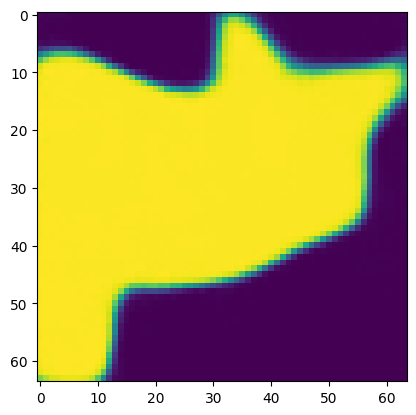

In [14]:
image = Image.open(BytesIO(image_data))
plt.imshow(image)